# Importing Libraries

In [4]:
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To Scale our data
from sklearn.preprocessing import scale

# Data Read

In [5]:
df = pd.read_csv('Leads.csv')

# Data Understanding

In [6]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
df.shape

(9240, 37)

<b>There are 9240 records and 37 columns.</b>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Variable Identification

In [9]:
# Checking the Converted Rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

38.53896103896104

<b>There is almost 40% of conversion in the given data set.

## Statistical summary

In [10]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Describe Categorical variables

In [11]:
cat_var = [cname for cname in df.columns if df[cname].dtype == "object"]
df[cat_var].describe()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,...,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,...,5,1,1,6,7,3,3,1,2,16
top,3b87b262-7c31-4075-a87a-ff4be7c8b55c,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,...,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,...,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


## Unique value counts

<b>This is a very important attribute to understand the variance in each column. This way we can identify which columns have same values, and which columns have different values.
    
It will help us decide whether or not to drop the variable.

In [12]:
valueCount_series = df.apply(lambda x: len(x.value_counts(dropna=False)) , axis=0) #returns object containing counts of unique values
unique_values = pd.DataFrame(valueCount_series, columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(df.dtypes)
unique_values

,Unique Value Count,dtype
Get updates on DM Content,1,object
I agree to pay the amount through cheque,1,object
Receive More Updates About Our Courses,1,object
Magazine,1,object
Update me on Supply Chain Content,1,object
Through Recommendations,2,object
Digital Advertisement,2,object
Newspaper,2,object
X Education Forums,2,object
A free copy of Mastering The Interview,2,object


## Dropping Columns with Single/All Different Values

'Prospect ID', and 'Lead Number' are columns which contains unique values for each record. They are like primary keys to identify each record. We can drop them as they won't serve any purpose. 

Below columns have "unique value count" of 1. They don't have any variance associated with them. Hence we can drop them for our analysis.

1. Get updates on DM Content
2. I agree to pay the amount through cheque
3. Receive More Updates About Our Courses
4. Magazine
5. Update me on Supply Chain Content

In [13]:
drop_col = ['Prospect ID', 'Lead Number', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 
            'Receive More Updates About Our Courses', 'Magazine', 'Update me on Supply Chain Content']
df.drop(drop_col, axis=1, inplace=True)

## Frequency Distribution of Unique Values of all Columns

In [14]:
cols = list(df.columns)
for col in cols:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of Lead Origin
############################################
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

############################################
Unique value distribution of Lead Source
############################################
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
testone                 1
youtubechannel          1
Pay per Click Ads       


############################################
Unique value distribution of A free copy of Mastering The Interview
############################################
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

############################################
Unique value distribution of Last Notable Activity
############################################
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Approached upfront                 1
Name: Last Notable Activ

## Dropping Columns with Very High Imabalance

Below columns have a very high number of a single value compared to the other hence not useful for the analysis.

In [15]:
for col in ['Through Recommendations', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 'Search', 
            'Newspaper Article', 'What matters most to you in choosing a course', 'Do Not Call']:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of Through Recommendations
############################################
No     9233
Yes       7
Name: Through Recommendations, dtype: int64

############################################
Unique value distribution of Digital Advertisement
############################################
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

############################################
Unique value distribution of Newspaper
############################################
No     9239
Yes       1
Name: Newspaper, dtype: int64

############################################
Unique value distribution of X Education Forums
############################################
No     9239
Yes       1
Name: X Education Forums, dtype: int64

############################################
Unique value distribution of Search
############################################
No     9226
Yes      14
Name: Search, dtype: int64

###############

In [16]:
drop_col = ['Through Recommendations', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 'Search', 
            'Newspaper Article', 'What matters most to you in choosing a course', 'Do Not Call']

df.drop(drop_col, axis=1, inplace=True)

## Dropping Insignificant Columns

If we observe the values of city column, most of them are from India which makes the column Country not useful for the analysis.

In [17]:
df.drop(['Country'], axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Specialization                            7802 non-null object
How did you hear about X Education        7033 non-null object
What is your current occupation           6550 non-null object
Tags                                      5887 non-null object
Lead Quality                              4473 non-null object
Lead Profile                              6531 non-null object
City       

## Rename Columns

In [19]:
df.rename(columns=
            {
             "Lead Origin":"Lead_Origin",
             "Lead Source":"Lead_Source",
             "Do Not Email":"No_Email",
             "TotalVisits":"Total_Visits",
             "Total Time Spent on Website":"Time_On_Website",
             "Page Views Per Visit":"Page_Views",
             "Last Activity":"Last_Activity",
             "How did you hear about X Education":"Hear",
             "What is your current occupation":"Occupation",
             "Lead Quality":"Lead_Quality",
             "Lead Profile":"Lead_Profile",
             "Asymmetrique Activity Index":"Activity_Index",
             "Asymmetrique Profile Index":"Profile_Index",
             "Asymmetrique Activity Score":"Activity_Score",
             "Asymmetrique Profile Score":"Profile_Score",
             "A free copy of Mastering The Interview":"Free_Copy",
             "Last Notable Activity":"Last_Notable_Activity"
            }, 
            inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
Lead_Origin              9240 non-null object
Lead_Source              9204 non-null object
No_Email                 9240 non-null object
Converted                9240 non-null int64
Total_Visits             9103 non-null float64
Time_On_Website          9240 non-null int64
Page_Views               9103 non-null float64
Last_Activity            9137 non-null object
Specialization           7802 non-null object
Hear                     7033 non-null object
Occupation               6550 non-null object
Tags                     5887 non-null object
Lead_Quality             4473 non-null object
Lead_Profile             6531 non-null object
City                     7820 non-null object
Activity_Index           5022 non-null object
Profile_Index            5022 non-null object
Activity_Score           5022 non-null float64
Profile_Score            5022 non-null float64
Free_Copy        

## Standardizing Values

Converting all text to lower helps in identifying duplicate values due to case.

In [21]:
cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

for col in cat_cols:
    df[col] = df[col].str.lower()

In [22]:
df.duplicated().value_counts()

False    7958
True     1282
dtype: int64

There are 1282 duplicate rows in the data set. We can drop them.

In [23]:
df.loc[df.duplicated()]

,Lead_Origin,Lead_Source,No_Email,Converted,Total_Visits,Time_On_Website,Page_Views,Last_Activity,Specialization,Hear,...,Tags,Lead_Quality,Lead_Profile,City,Activity_Index,Profile_Index,Activity_Score,Profile_Score,Free_Copy,Last_Notable_Activity
16,api,olark chat,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,...,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
47,api,olark chat,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,...,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
49,api,olark chat,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,...,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
83,api,olark chat,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,...,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
190,api,olark chat,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,...,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
192,api,olark chat,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,...,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
198,api,olark chat,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,...,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
199,api,olark chat,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,...,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified
236,api,olark chat,no,0,0.0,0,0.0,email opened,select,select,...,ringing,NaN,select,select,02.medium,02.medium,14.0,15.0,no,email opened
241,api,olark chat,no,0,0.0,0,0.0,olark chat conversation,NaN,NaN,...,NaN,NaN,NaN,NaN,01.high,02.medium,17.0,15.0,no,modified


In [24]:
df.drop_duplicates(keep='first', inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7958 entries, 0 to 9239
Data columns (total 21 columns):
Lead_Origin              7958 non-null object
Lead_Source              7925 non-null object
No_Email                 7958 non-null object
Converted                7958 non-null int64
Total_Visits             7821 non-null float64
Time_On_Website          7958 non-null int64
Page_Views               7821 non-null float64
Last_Activity            7855 non-null object
Specialization           7259 non-null object
Hear                     6490 non-null object
Occupation               6007 non-null object
Tags                     5556 non-null object
Lead_Quality             4253 non-null object
Lead_Profile             5988 non-null object
City                     7276 non-null object
Activity_Index           4444 non-null object
Profile_Index            4444 non-null object
Activity_Score           4444 non-null float64
Profile_Score            4444 non-null float64
Free_Copy        

## Missing Values

In [26]:
null_series = pd.Series(round(100*(df.isnull().sum(axis=0)/len(df.index)), 2).sort_values(ascending = False))
null_series

Lead_Quality             46.56
Profile_Score            44.16
Activity_Score           44.16
Profile_Index            44.16
Activity_Index           44.16
Tags                     30.18
Lead_Profile             24.75
Occupation               24.52
Hear                     18.45
Specialization            8.78
City                      8.57
Page_Views                1.72
Total_Visits              1.72
Last_Activity             1.29
Lead_Source               0.41
Converted                 0.00
No_Email                  0.00
Last_Notable_Activity     0.00
Time_On_Website           0.00
Free_Copy                 0.00
Lead_Origin               0.00
dtype: float64

Dropping columns whose missing value % is >= 30% as they won't help in the analysis and imputing them would only add more bias.

In [27]:
drop_col = ['Lead_Quality','Profile_Score','Activity_Score','Profile_Index','Activity_Index','Tags']

df.drop(drop_col, axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7958 entries, 0 to 9239
Data columns (total 15 columns):
Lead_Origin              7958 non-null object
Lead_Source              7925 non-null object
No_Email                 7958 non-null object
Converted                7958 non-null int64
Total_Visits             7821 non-null float64
Time_On_Website          7958 non-null int64
Page_Views               7821 non-null float64
Last_Activity            7855 non-null object
Specialization           7259 non-null object
Hear                     6490 non-null object
Occupation               6007 non-null object
Lead_Profile             5988 non-null object
City                     7276 non-null object
Free_Copy                7958 non-null object
Last_Notable_Activity    7958 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 994.8+ KB


<b>Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value

In [29]:
cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

cols = list(cat_cols)
for col in cols:
    print('\n############################################')
    print('Unique value distribution of ' + str(col))
    print('############################################')
    print(df[col].value_counts(dropna=False).sort_values(ascending = False))


############################################
Unique value distribution of Lead_Origin
############################################
landing page submission    4886
api                        2498
lead add form               521
lead import                  52
quick add form                1
Name: Lead_Origin, dtype: int64

############################################
Unique value distribution of Lead_Source
############################################
google               2873
direct traffic       2543
organic search       1154
olark chat            673
reference             409
referral sites        125
welingak website       73
facebook               52
NaN                    33
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
testone                 1
youtubechannel          1
blog                    1
welearn                 1
welearnblog_home        1
pay per click ads       1
nc_edm                  

<b>We are going to apply a general strategy here to impute nulls, which is to impute them with the 'select' value which is equivalent to null. At a later stage, dummy variables are created and the select dummy variable will be dropped.

This will take care of nulls and as well as preserves the information.

Same is the case with other columns (Occupation, Last_Activity, Lead_Source)  where the nulls are imputed with 'unspecified' and that dummy variable is dropped later.

In [30]:
# Check the above for the strategy

df['Specialization'].fillna(value='select', inplace=True)
df['Hear'].fillna(value='select', inplace=True)
df['Lead_Profile'].fillna(value='select', inplace=True)
df['City'].fillna(value='select', inplace=True)

# Imputing

df['Occupation'].fillna(value='unspecified', inplace=True)
df['Last_Activity'].fillna(value='unspecified', inplace=True)
df['Lead_Source'].fillna(value='unspecified', inplace=True)

In [31]:
df.isnull().sum()

Lead_Origin                0
Lead_Source                0
No_Email                   0
Converted                  0
Total_Visits             137
Time_On_Website            0
Page_Views               137
Last_Activity              0
Specialization             0
Hear                       0
Occupation                 0
Lead_Profile               0
City                       0
Free_Copy                  0
Last_Notable_Activity      0
dtype: int64

'Total_Visits' and 'Page_Views' are numeric columns and have null values. We will be Imputing them with the mode value.

In [32]:
df['Total_Visits'].mode()

0    2.0
dtype: float64

In [33]:
df['Page_Views'].mode()

0    2.0
dtype: float64

In [34]:
# Imputing with the mode value

df['Total_Visits'].fillna(value=2.0, inplace=True)
df['Page_Views'].fillna(value=2.0, inplace=True)

In [35]:
df.isnull().values.any()

False

## Let's check the unique value counts again

In [36]:
valueCount_series = df.apply(lambda x: len(x.value_counts(dropna=False)) , axis=0) #returns object containing counts of unique values
unique_values = pd.DataFrame(valueCount_series, columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
unique_values['dtype'] = pd.DataFrame(df.dtypes)
unique_values

,Unique Value Count,dtype
No_Email,2,object
Converted,2,int64
Free_Copy,2,object
Lead_Origin,5,object
Lead_Profile,6,object
Occupation,7,object
City,7,object
Hear,10,object
Last_Notable_Activity,16,object
Last_Activity,18,object


Since 'No_Email' and 'Free_Copy' columns have only two values, we employ binary encoding using map function.

In [37]:
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# List of variables to map
varlist =  ['No_Email', 'Free_Copy']

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7958 entries, 0 to 9239
Data columns (total 15 columns):
Lead_Origin              7958 non-null object
Lead_Source              7958 non-null object
No_Email                 7958 non-null int64
Converted                7958 non-null int64
Total_Visits             7958 non-null float64
Time_On_Website          7958 non-null int64
Page_Views               7958 non-null float64
Last_Activity            7958 non-null object
Specialization           7958 non-null object
Hear                     7958 non-null object
Occupation               7958 non-null object
Lead_Profile             7958 non-null object
City                     7958 non-null object
Free_Copy                7958 non-null int64
Last_Notable_Activity    7958 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 994.8+ KB


## Creating Dummy variables

Going with plain old dummy variable creation for 'Lead_Origin', 'Last_Notable_Activity' columns.

In [39]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Lead_Origin', 'Last_Notable_Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [40]:
# We have created dummies for the below variables, so we can drop them

df = df.drop(['Lead_Origin', 'Last_Notable_Activity'], 1)

In [41]:
# Creating dummy variables for the remaining categorical variables and dropping the level which was created to impute nulls

############################################################################################################

# Creating dummy variables for the variable 'Specialization'
specialization = pd.get_dummies(df['Specialization'], prefix='Specialization')

# Dropping Specialization_select column
specialization = specialization.drop(['Specialization_select'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, specialization], axis=1)

# Dropping the redundant column
df = df.drop(['Specialization'], 1)

############################################################################################################

# Creating dummy variables for the variable 'Hear'
hear = pd.get_dummies(df['Hear'], prefix='Hear')

# Dropping Hear_select column
hear = hear.drop(['Hear_select'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, hear], axis=1)

# Dropping the redundant column
df = df.drop(['Hear'], 1)

############################################################################################################

# Creating dummy variables for the variable 'Lead_Profile'
lead_profile = pd.get_dummies(df['Lead_Profile'], prefix='Lead_Profile')

# Dropping Lead_Profile_select column
lead_profile = lead_profile.drop(['Lead_Profile_select'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, lead_profile], axis=1)

# Dropping the redundant column
df = df.drop(['Lead_Profile'], 1)

############################################################################################################

# Creating dummy variables for the variable 'City'
city = pd.get_dummies(df['City'], prefix='City')

# Dropping City_select column
city = city.drop(['City_select'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, city], axis=1)

# Dropping the redundant column
df = df.drop(['City'], 1)

############################################################################################################

# Creating dummy variables for the variable 'Occupation'
occupation = pd.get_dummies(df['Occupation'], prefix='Occupation')

# Dropping Occupation_unspecified column
occupation = occupation.drop(['Occupation_unspecified'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, occupation], axis=1)

# Dropping the redundant column
df = df.drop(['Occupation'], 1)

############################################################################################################

# Creating dummy variables for the variable 'Last_Activity'
last_activity = pd.get_dummies(df['Last_Activity'], prefix='Last_Activity')

# Dropping Last_Activity_unspecified column
last_activity = last_activity.drop(['Last_Activity_unspecified'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, last_activity], axis=1)

# Dropping the redundant column
df = df.drop(['Last_Activity'], 1)

############################################################################################################

# Creating dummy variables for the variable 'Lead_Source'
lead_source = pd.get_dummies(df['Lead_Source'], prefix='Lead_Source')

# Dropping Lead_Source_unspecified column
lead_source = lead_source.drop(['Lead_Source_unspecified'], 1)

# Adding the results to the master dataframe
df = pd.concat([df, lead_source], axis=1)

# Dropping the redundant column
df = df.drop(['Lead_Source'], 1)

In [42]:
len(df.columns)

106

We finally are left with 106 columns to deal with for our analysis.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7958 entries, 0 to 9239
Columns: 106 entries, No_Email to Lead_Source_youtubechannel
dtypes: float64(2), int64(4), uint8(100)
memory usage: 1.2 MB


In [44]:
list(df.columns)

['No_Email',
 'Converted',
 'Total_Visits',
 'Time_On_Website',
 'Page_Views',
 'Free_Copy',
 'Lead_Origin_landing page submission',
 'Lead_Origin_lead add form',
 'Lead_Origin_lead import',
 'Lead_Origin_quick add form',
 'Last_Notable_Activity_email bounced',
 'Last_Notable_Activity_email link clicked',
 'Last_Notable_Activity_email marked spam',
 'Last_Notable_Activity_email opened',
 'Last_Notable_Activity_email received',
 'Last_Notable_Activity_form submitted on website',
 'Last_Notable_Activity_had a phone conversation',
 'Last_Notable_Activity_modified',
 'Last_Notable_Activity_olark chat conversation',
 'Last_Notable_Activity_page visited on website',
 'Last_Notable_Activity_resubscribed to emails',
 'Last_Notable_Activity_sms sent',
 'Last_Notable_Activity_unreachable',
 'Last_Notable_Activity_unsubscribed',
 'Last_Notable_Activity_view in browser link clicked',
 'Specialization_banking, investment and insurance',
 'Specialization_business administration',
 'Specialization_e-

# Check for Outliers in the numeric columns

In [45]:
def univariate_continuos(df):    
    numeric_cols = ['Total_Visits','Time_On_Website','Page_Views']   
    for col in numeric_cols:   
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

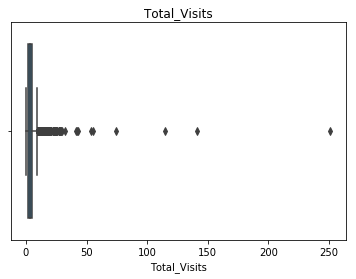

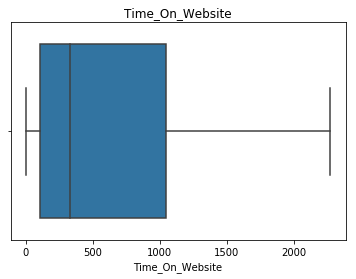

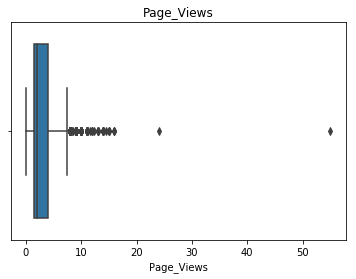

In [46]:
univariate_continuos(df)

<b>Columns 'Total_Visits' and 'Page_Views' have outliers in their data and will be dealt with the common capping method where we assign the 'Q3+1.5*IQR' value to the values greater than that.

In [47]:
def outlier_treatment(df, col):

    print('#########################')
    print(col)
    print('#########################')
    
    Q1 = df[col].quantile(0.25)
    print('Q1 is => ' + str(Q1))

    Q3 = df[col].quantile(0.75)
    print('Q3 is => ' + str(Q3))

    IQR = Q3 - Q1

    fence_high = Q3+1.5*IQR
    print('Fence High is => ' + str(fence_high))
    
    print('Imputing values greater than ' + str(fence_high) + ' with the same value')

    df.loc[(df[col] > fence_high), col] = fence_high
    
    print('\n')
    
    return df

In [48]:
df = outlier_treatment(df, 'Total_Visits')
df = outlier_treatment(df, 'Page_Views')

#########################
Total_Visits
#########################
Q1 is => 2.0
Q3 is => 5.0
Fence High is => 9.5
Imputing values greater than 9.5 with the same value


#########################
Page_Views
#########################
Q1 is => 1.545
Q3 is => 4.0
Fence High is => 7.6825
Imputing values greater than 7.6825 with the same value




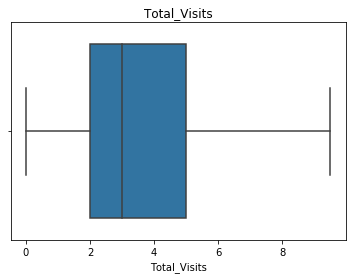

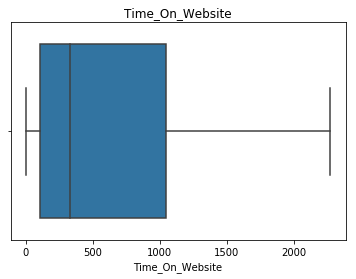

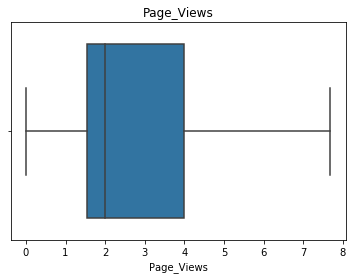

In [49]:
univariate_continuos(df)

Now, the outliers are treated.

## Model Creation

## Test-Train Split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
X.head()

,No_Email,Total_Visits,Time_On_Website,Page_Views,Free_Copy,Lead_Origin_landing page submission,Lead_Origin_lead add form,Lead_Origin_lead import,Lead_Origin_quick add form,Last_Notable_Activity_email bounced,...,Lead_Source_pay per click ads,Lead_Source_press_release,Lead_Source_reference,Lead_Source_referral sites,Lead_Source_social media,Lead_Source_testone,Lead_Source_welearn,Lead_Source_welearnblog_home,Lead_Source_welingak website,Lead_Source_youtubechannel
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Putting response variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

Using standard scaler for the non dummy variables.

In [55]:
scaler = StandardScaler()
X_train[['Total_Visits','Time_On_Website','Page_Views']] = scaler.fit_transform(X_train[['Total_Visits','Time_On_Website','Page_Views']])
X_train.head()

C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A val

,No_Email,Total_Visits,Time_On_Website,Page_Views,Free_Copy,Lead_Origin_landing page submission,Lead_Origin_lead add form,Lead_Origin_lead import,Lead_Origin_quick add form,Last_Notable_Activity_email bounced,...,Lead_Source_pay per click ads,Lead_Source_press_release,Lead_Source_reference,Lead_Source_referral sites,Lead_Source_social media,Lead_Source_testone,Lead_Source_welearn,Lead_Source_welearnblog_home,Lead_Source_welingak website,Lead_Source_youtubechannel
5032,0,2.286705,1.395384,2.812711,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5316,1,0.537738,-0.890202,1.309611,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4405,0,-1.405558,-1.031803,-1.492065,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2089,0,-0.628239,1.139413,-0.371395,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1370,0,-1.405558,-1.031803,-1.492065,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_train[['Total_Visits','Time_On_Website','Page_Views']].describe()

,Total_Visits,Time_On_Website,Page_Views
count,5.570000e+03,5.570000e+03,5.570000e+03
mean,-2.542152e-16,4.267482e-17,1.873626e-17
std,1.000090e+00,1.000090e+00,1.000090e+00
min,-1.405558e+00,-1.031803e+00,-1.492065e+00
25%,-6.282394e-01,-8.393706e-01,-5.955289e-01
50%,-2.395801e-01,-4.218291e-01,-3.713947e-01
75%,5.377383e-01,8.671035e-01,7.492760e-01
max,2.286705e+00,3.092781e+00,2.812711e+00


## Multi Collinearity

In [57]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

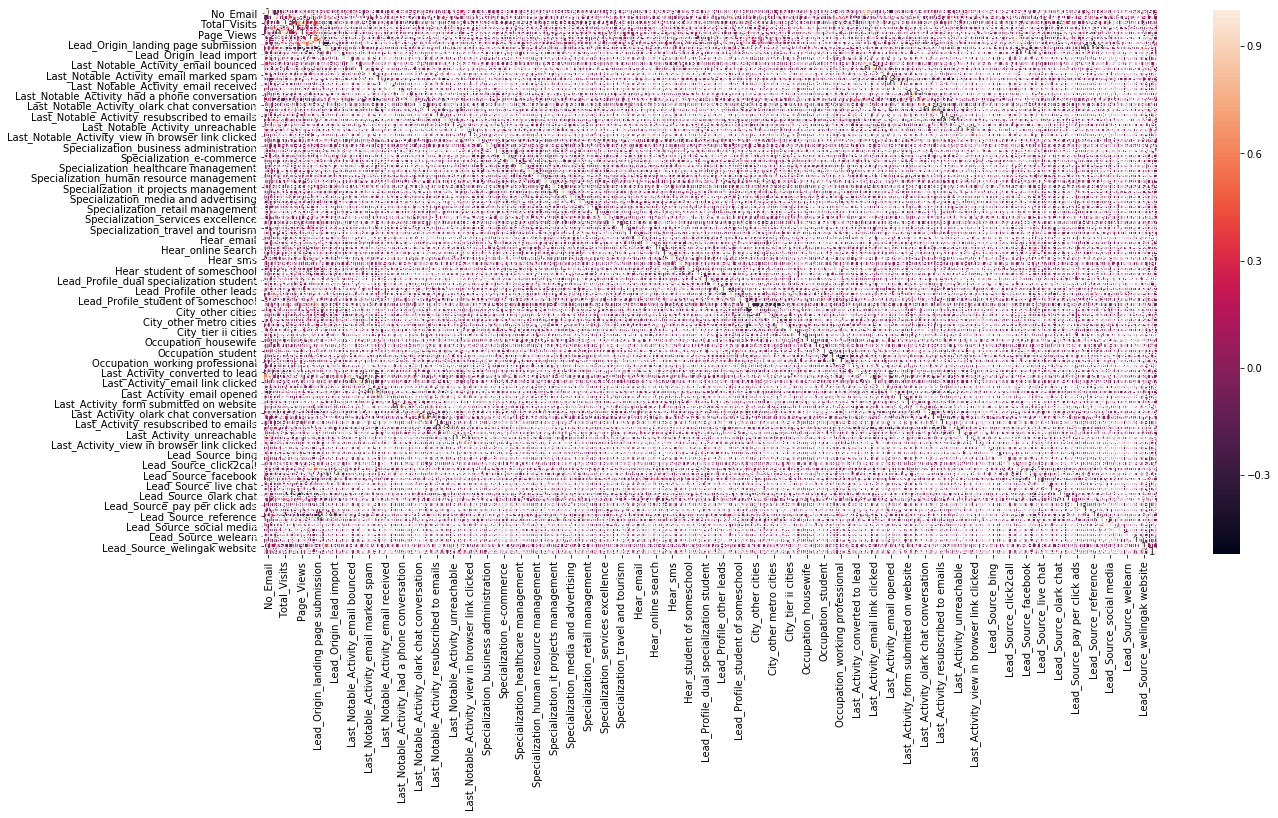

In [58]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

Since it is not clear with the heat map, we will let RFE deal with dropping the variables with high collinearity and subsequently using manual elimination based on VIF and p-values.

## Feature Selection Using RFE (with 15 variables)

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15) # Running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\si

C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\si

In [61]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False])

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('No_Email', True, 1),
 ('Total_Visits', False, 34),
 ('Time_On_Website', True, 1),
 ('Page_Views', False, 35),
 ('Free_Copy', False, 83),
 ('Lead_Origin_landing page submission', False, 39),
 ('Lead_Origin_lead add form', True, 1),
 ('Lead_Origin_lead import', False, 42),
 ('Lead_Origin_quick add form', False, 33),
 ('Last_Notable_Activity_email bounced', False, 64),
 ('Last_Notable_Activity_email link clicked', False, 24),
 ('Last_Notable_Activity_email marked spam', False, 63),
 ('Last_Notable_Activity_email opened', False, 9),
 ('Last_Notable_Activity_email received', False, 89),
 ('Last_Notable_Activity_form submitted on website', False, 76),
 ('Last_Notable_Activity_had a phone conversation', True, 1),
 ('Last_Notable_Activity_modified', False, 2),
 ('Last_Notable_Activity_olark chat conversation', False, 8),
 ('Last_Notable_Activity_page visited on website', False, 30),
 ('Last_Notable_Activity_resubscribed to emails', False, 14),
 ('Last_Notable_Activity_sms sent', False, 65),

In [63]:
col = X_train.columns[rfe.support_]
col

Index(['No_Email', 'Time_On_Website', 'Lead_Origin_lead add form',
       'Last_Notable_Activity_had a phone conversation',
       'Last_Notable_Activity_unreachable',
       'Lead_Profile_dual specialization student',
       'Lead_Profile_lateral student', 'Lead_Profile_potential lead',
       'Lead_Profile_student of someschool', 'Occupation_housewife',
       'Occupation_other', 'Occupation_working professional',
       'Last_Activity_approached upfront', 'Last_Activity_sms sent',
       'Lead_Source_welingak website'],
      dtype='object')

In [64]:
X_train.columns[~rfe.support_]

Index(['Total_Visits', 'Page_Views', 'Free_Copy',
       'Lead_Origin_landing page submission', 'Lead_Origin_lead import',
       'Lead_Origin_quick add form', 'Last_Notable_Activity_email bounced',
       'Last_Notable_Activity_email link clicked',
       'Last_Notable_Activity_email marked spam',
       'Last_Notable_Activity_email opened',
       'Last_Notable_Activity_email received',
       'Last_Notable_Activity_form submitted on website',
       'Last_Notable_Activity_modified',
       'Last_Notable_Activity_olark chat conversation',
       'Last_Notable_Activity_page visited on website',
       'Last_Notable_Activity_resubscribed to emails',
       'Last_Notable_Activity_sms sent', 'Last_Notable_Activity_unsubscribed',
       'Last_Notable_Activity_view in browser link clicked',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance manag

## Model Building

In [65]:
import statsmodels.api as sm
from sklearn import metrics

# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
def model_accuracy(res, X_train_sm, y_train):
    # Getting the predicted values on the train set

    y_train_pred = res.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)

    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_final['CustID'] = y_train.index

    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

    from sklearn import metrics

    # Confusion matrix 
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    print(confusion)

    # Let's check the overall accuracy.
    print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5554
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2365.3
Date:                Fri, 07 Jun 2019   Deviance:                       4730.7
Time:                        15:00:01   Pearson chi2:                 6.67e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.5475      0.053    -28.960      0.000      -1.652      -1.443
No_Email                                          -1.1636      0.160     -7.292      0.000      -1.476      -0.851
Time_On_Website                                    0.9439      0.038     25.130      0.000       0.870       1.018
Lead_Origin_lead add form                          2.8865      0.214     13.492      0.000       2.467       3.306
Last_Notable_Activity_had a phone conversation     2.7355      1.195      2.288      0.022       0.392       5.078
Last_Notable_Activity_unreachable                  1.9641      0.600      3.276      0.001       0.789       3.139
Lead_Profile_dual specialization student          23.9139   2.12e+04      0.001      0.999   -4.15e+04    4.16e+04
Lead_Profile_lateral student                       3.0328      1.091      2.781      0.005       0.895       5.170
Lead_Profile_potential lead                        1.8870      0.098     19.183      0.000       1.694       2.080
Lead_Profile_student of someschool                -1.7286      0.434     -3.983      0.000      -2.579      -0.878
Occupation_housewife                              23.8898   2.25e+04      0.001      0.999   -4.42e+04    4.42e+04
Occupation_other                                   1.7092      0.714      2.394      0.017       0.310       3.108
Occupation_working professional                    2.4077      0.190     12.662      0.000       2.035       2.780
Last_Activity_approached upfront                  24.6926   3.51e+04      0.001      0.999   -6.88e+04    6.88e+04
Last_Activity_sms sent                             1.3317      0.077     17.302      0.000       1.181       1.483
Lead_Source_welingak website                       2.7821      1.042      2.670      0.008       0.740       4.824
==================================================================================================================
"""

In [68]:
model_accuracy(res, X_train_sm, y_train)

[[2988  387]
 [ 685 1510]]
0.8075403949730701


In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_lead add form,1.37
7,Lead_Profile_potential lead,1.28
14,Lead_Source_welingak website,1.18
11,Occupation_working professional,1.17
13,Last_Activity_sms sent,1.15
1,Time_On_Website,1.06
0,No_Email,1.04
3,Last_Notable_Activity_had a phone conversation,1.01
6,Lead_Profile_lateral student,1.01
8,Lead_Profile_student of someschool,1.01


VIF values of all the variables are significant. However we have some variables with p values > 0.05.

We will drop 'Occupation_housewife' variable since it has high p value of 0.999 and higher VIF compared to other variables with similar p value.

In [70]:
col = col.drop('Occupation_housewife', 1)

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5555
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2371.0
Date:                Fri, 07 Jun 2019   Deviance:                       4742.0
Time:                        15:10:21   Pearson chi2:                 6.72e+03
No. Iterations:                    22   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.5410      0.053    -28.909      0.000      -1.645      -1.437
No_Email                                          -1.1690      0.160     -7.323      0.000      -1.482      -0.856
Time_On_Website                                    0.9426      0.038     25.119      0.000       0.869       1.016
Lead_Origin_lead add form                          2.9216      0.213     13.685      0.000       2.503       3.340
Last_Notable_Activity_had a phone conversation     2.7289      1.195      2.283      0.022       0.386       5.071
Last_Notable_Activity_unreachable                  1.9575      0.599      3.265      0.001       0.782       3.132
Lead_Profile_dual specialization student          23.9134   2.12e+04      0.001      0.999   -4.16e+04    4.16e+04
Lead_Profile_lateral student                       3.0223      1.091      2.770      0.006       0.884       5.161
Lead_Profile_potential lead                        1.8851      0.098     19.193      0.000       1.693       2.078
Lead_Profile_student of someschool                -1.7337      0.434     -3.995      0.000      -2.584      -0.883
Occupation_other                                   1.7029      0.714      2.386      0.017       0.304       3.102
Occupation_working professional                    2.4024      0.190     12.636      0.000       2.030       2.775
Last_Activity_approached upfront                  24.6857   3.51e+04      0.001      0.999   -6.88e+04    6.88e+04
Last_Activity_sms sent                             1.3254      0.077     17.235      0.000       1.175       1.476
Lead_Source_welingak website                       2.7427      1.042      2.633      0.008       0.701       4.785
==================================================================================================================
"""

In [72]:
model_accuracy(res, X_train_sm, y_train)

[[2987  388]
 [ 687 1508]]
0.8070017953321365


In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_lead add form,1.37
7,Lead_Profile_potential lead,1.28
13,Lead_Source_welingak website,1.18
10,Occupation_working professional,1.17
12,Last_Activity_sms sent,1.15
1,Time_On_Website,1.06
0,No_Email,1.04
3,Last_Notable_Activity_had a phone conversation,1.01
6,Lead_Profile_lateral student,1.01
8,Lead_Profile_student of someschool,1.01


We will drop 'Lead_Profile_dual specialization student' variable since it has high p value of 0.999 and higher VIF compared to other variables with similar p value.

In [74]:
col = col.drop('Lead_Profile_dual specialization student', 1)

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5556
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2379.7
Date:                Fri, 07 Jun 2019   Deviance:                       4759.4
Time:                        15:14:17   Pearson chi2:                 6.73e+03
No. Iterations:                    20   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.5340      0.053    -28.858      0.000      -1.638      -1.430
No_Email                                          -1.1540      0.159     -7.274      0.000      -1.465      -0.843
Time_On_Website                                    0.9431      0.037     25.168      0.000       0.870       1.016
Lead_Origin_lead add form                          2.9151      0.213     13.663      0.000       2.497       3.333
Last_Notable_Activity_had a phone conversation     2.7246      1.195      2.281      0.023       0.383       5.066
Last_Notable_Activity_unreachable                  1.9526      0.599      3.258      0.001       0.778       3.127
Lead_Profile_lateral student                       3.0150      1.091      2.763      0.006       0.877       5.153
Lead_Profile_potential lead                        1.8777      0.098     19.129      0.000       1.685       2.070
Lead_Profile_student of someschool                -1.7419      0.434     -4.015      0.000      -2.592      -0.892
Occupation_other                                   1.6960      0.714      2.376      0.017       0.297       3.095
Occupation_working professional                    2.4066      0.190     12.686      0.000       2.035       2.778
Last_Activity_approached upfront                  22.6781   1.29e+04      0.002      0.999   -2.53e+04    2.53e+04
Last_Activity_sms sent                             1.3252      0.077     17.262      0.000       1.175       1.476
Lead_Source_welingak website                       2.7391      1.042      2.630      0.009       0.698       4.781
==================================================================================================================
"""

In [76]:
model_accuracy(res, X_train_sm, y_train)

[[2986  389]
 [ 691 1504]]
0.8061041292639138


In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_lead add form,1.37
6,Lead_Profile_potential lead,1.28
12,Lead_Source_welingak website,1.18
9,Occupation_working professional,1.17
11,Last_Activity_sms sent,1.15
1,Time_On_Website,1.06
0,No_Email,1.04
3,Last_Notable_Activity_had a phone conversation,1.01
5,Lead_Profile_lateral student,1.01
7,Lead_Profile_student of someschool,1.01


We will drop 'Last_Activity_approached upfront' variable since it has high p value of 0.999 and higher VIF compared to other variables with similar p value.

In [78]:
col = col.drop('Last_Activity_approached upfront', 1)

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5557
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2384.5
Date:                Fri, 07 Jun 2019   Deviance:                       4769.0
Time:                        15:17:15   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.5276      0.053    -28.806      0.000      -1.632      -1.424
No_Email                                          -1.1569      0.159     -7.296      0.000      -1.468      -0.846
Time_On_Website                                    0.9440      0.037     25.223      0.000       0.871       1.017
Lead_Origin_lead add form                          2.9129      0.213     13.656      0.000       2.495       3.331
Last_Notable_Activity_had a phone conversation     2.7203      1.194      2.278      0.023       0.379       5.061
Last_Notable_Activity_unreachable                  1.9480      0.599      3.252      0.001       0.774       3.122
Lead_Profile_lateral student                       3.0096      1.091      2.759      0.006       0.871       5.148
Lead_Profile_potential lead                        1.8731      0.098     19.091      0.000       1.681       2.065
Lead_Profile_student of someschool                -1.7485      0.434     -4.030      0.000      -2.599      -0.898
Occupation_other                                   1.6897      0.714      2.367      0.018       0.291       3.089
Occupation_working professional                    2.4030      0.190     12.670      0.000       2.031       2.775
Last_Activity_sms sent                             1.3196      0.077     17.204      0.000       1.169       1.470
Lead_Source_welingak website                       2.7382      1.042      2.629      0.009       0.697       4.780
==================================================================================================================
"""

In [80]:
model_accuracy(res, X_train_sm, y_train)

[[2985  390]
 [ 691 1504]]
0.8059245960502693


In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_lead add form,1.37
6,Lead_Profile_potential lead,1.28
11,Lead_Source_welingak website,1.18
9,Occupation_working professional,1.17
10,Last_Activity_sms sent,1.15
1,Time_On_Website,1.05
0,No_Email,1.04
3,Last_Notable_Activity_had a phone conversation,1.01
5,Lead_Profile_lateral student,1.01
7,Lead_Profile_student of someschool,1.01


We will drop 'Last_Notable_Activity_had a phone conversation' variable since it has relatively higher p value compared to the other variables and also to see if the accuracy of the model drops with dropping this.

In [82]:
col = col.drop('Last_Notable_Activity_had a phone conversation', 1)

In [83]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5558
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2388.0
Date:                Fri, 07 Jun 2019   Deviance:                       4776.0
Time:                        15:21:29   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.5231      0.053    -28.764      0.000      -1.627      -1.419
No_Email                              -1.1596      0.159     -7.314      0.000      -1.470      -0.849
Time_On_Website                        0.9428      0.037     25.227      0.000       0.870       1.016
Lead_Origin_lead add form              2.9060      0.213     13.621      0.000       2.488       3.324
Last_Notable_Activity_unreachable      1.9401      0.599      3.237      0.001       0.765       3.115
Lead_Profile_lateral student           3.0069      1.091      2.757      0.006       0.869       5.145
Lead_Profile_potential lead            1.8841      0.098     19.236      0.000       1.692       2.076
Lead_Profile_student of someschool    -1.7520      0.434     -4.038      0.000      -2.602      -0.902
Occupation_other                       1.6850      0.714      2.361      0.018       0.286       3.084
Occupation_working professional        2.3998      0.190     12.659      0.000       2.028       2.771
Last_Activity_sms sent                 1.3145      0.077     17.146      0.000       1.164       1.465
Lead_Source_welingak website           2.7414      1.042      2.632      0.008       0.700       4.783
======================================================================================================
"""

In [84]:
model_accuracy(res, X_train_sm, y_train)

[[2985  390]
 [ 694 1501]]
0.8053859964093357


In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_lead add form,1.37
5,Lead_Profile_potential lead,1.27
10,Lead_Source_welingak website,1.18
8,Occupation_working professional,1.17
9,Last_Activity_sms sent,1.15
1,Time_On_Website,1.05
0,No_Email,1.04
4,Lead_Profile_lateral student,1.01
6,Lead_Profile_student of someschool,1.01
3,Last_Notable_Activity_unreachable,1.00


We will drop 'Occupation_other' variable since it has relatively higher p value compared to the other variables and also to see if the accuracy of the model drops with dropping this.

In [86]:
col = col.drop('Occupation_other', 1)

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5559
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2390.8
Date:                Fri, 07 Jun 2019   Deviance:                       4781.5
Time:                        15:23:00   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.5151      0.053    -28.721      0.000      -1.618      -1.412
No_Email                              -1.1633      0.158     -7.342      0.000      -1.474      -0.853
Time_On_Website                        0.9429      0.037     25.245      0.000       0.870       1.016
Lead_Origin_lead add form              2.9020      0.213     13.607      0.000       2.484       3.320
Last_Notable_Activity_unreachable      1.9337      0.599      3.227      0.001       0.759       3.108
Lead_Profile_lateral student           3.0004      1.091      2.751      0.006       0.863       5.138
Lead_Profile_potential lead            1.8796      0.098     19.211      0.000       1.688       2.071
Lead_Profile_student of someschool    -1.7597      0.434     -4.056      0.000      -2.610      -0.909
Occupation_working professional        2.3950      0.189     12.639      0.000       2.024       2.766
Last_Activity_sms sent                 1.3076      0.077     17.083      0.000       1.158       1.458
Lead_Source_welingak website           2.7406      1.042      2.631      0.009       0.699       4.782
======================================================================================================
"""

In [88]:
model_accuracy(res, X_train_sm, y_train)

[[2984  391]
 [ 693 1502]]
0.8053859964093357


In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead_Origin_lead add form,1.37
5,Lead_Profile_potential lead,1.27
9,Lead_Source_welingak website,1.18
7,Occupation_working professional,1.17
8,Last_Activity_sms sent,1.15
1,Time_On_Website,1.05
0,No_Email,1.04
4,Lead_Profile_lateral student,1.01
6,Lead_Profile_student of someschool,1.01
3,Last_Notable_Activity_unreachable,1.00


We will drop 'Lead_Source_welingak website' variable since it has relatively higher p value compared to the other variables and also to see if the accuracy of the model drops with dropping this.

In [90]:
col = col.drop('Lead_Source_welingak website', 1)

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5560
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2398.2
Date:                Fri, 07 Jun 2019   Deviance:                       4796.4
Time:                        15:25:08   Pearson chi2:                 7.27e+03
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.5125      0.053    -28.710      0.000      -1.616      -1.409
No_Email                              -1.1515      0.157     -7.322      0.000      -1.460      -0.843
Time_On_Website                        0.9425      0.037     25.252      0.000       0.869       1.016
Lead_Origin_lead add form              3.2380      0.205     15.782      0.000       2.836       3.640
Last_Notable_Activity_unreachable      1.9328      0.599      3.226      0.001       0.759       3.107
Lead_Profile_lateral student           2.9794      1.092      2.727      0.006       0.838       5.121
Lead_Profile_potential lead            1.8632      0.098     19.037      0.000       1.671       2.055
Lead_Profile_student of someschool    -1.7625      0.434     -4.063      0.000      -2.613      -0.912
Occupation_working professional        2.3858      0.190     12.576      0.000       2.014       2.758
Last_Activity_sms sent                 1.3075      0.076     17.112      0.000       1.158       1.457
======================================================================================================
"""

In [92]:
model_accuracy(res, X_train_sm, y_train)

[[2983  392]
 [ 695 1500]]
0.8048473967684021


In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead_Profile_potential lead,1.26
2,Lead_Origin_lead add form,1.17
7,Occupation_working professional,1.16
8,Last_Activity_sms sent,1.15
1,Time_On_Website,1.05
0,No_Email,1.04
4,Lead_Profile_lateral student,1.01
6,Lead_Profile_student of someschool,1.01
3,Last_Notable_Activity_unreachable,1.00


We will drop 'Lead_Profile_lateral student' variable since it has relatively higher p value compared to the other variables and also to see if the accuracy of the model drops with dropping this.

In [94]:
col = col.drop('Lead_Profile_lateral student', 1)

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5561
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2404.9
Date:                Fri, 07 Jun 2019   Deviance:                       4809.7
Time:                        15:27:07   Pearson chi2:                 7.34e+03
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.5027      0.052    -28.628      0.000      -1.606      -1.400
No_Email                              -1.1490      0.157     -7.329      0.000      -1.456      -0.842
Time_On_Website                        0.9438      0.037     25.313      0.000       0.871       1.017
Lead_Origin_lead add form              3.2909      0.205     16.080      0.000       2.890       3.692
Last_Notable_Activity_unreachable      1.9259      0.599      3.216      0.001       0.752       3.100
Lead_Profile_potential lead            1.8528      0.098     18.941      0.000       1.661       2.045
Lead_Profile_student of someschool    -1.7732      0.434     -4.087      0.000      -2.624      -0.923
Occupation_working professional        2.3882      0.189     12.607      0.000       2.017       2.759
Last_Activity_sms sent                 1.2990      0.076     17.023      0.000       1.149       1.449
======================================================================================================
"""

In [96]:
model_accuracy(res, X_train_sm, y_train)

[[2973  402]
 [ 696 1499]]
0.8028725314183124


In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead_Profile_potential lead,1.26
2,Lead_Origin_lead add form,1.16
6,Occupation_working professional,1.16
7,Last_Activity_sms sent,1.15
1,Time_On_Website,1.05
0,No_Email,1.04
5,Lead_Profile_student of someschool,1.01
3,Last_Notable_Activity_unreachable,1.00


We will drop 'Last_Notable_Activity_unreachable' variable since it has relatively higher p value compared to the other variables and also to see if the accuracy of the model drops with dropping this.

In [98]:
col = col.drop('Last_Notable_Activity_unreachable', 1)

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logmodel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmodel.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5570
Model:                            GLM   Df Residuals:                     5562
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2410.6
Date:                Fri, 07 Jun 2019   Deviance:                       4821.2
Time:                        15:28:39   Pearson chi2:                 7.37e+03
No. Iterations:                     6   Covariance Type:             nonrobust
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.4914      0.052    -28.543      0.000      -1.594      -1.389
No_Email                              -1.1550      0.157     -7.374      0.000      -1.462      -0.848
Time_On_Website                        0.9408      0.037     25.277      0.000       0.868       1.014
Lead_Origin_lead add form              3.2830      0.205     16.053      0.000       2.882       3.684
Lead_Profile_potential lead            1.8635      0.098     19.075      0.000       1.672       2.055
Lead_Profile_student of someschool    -1.7822      0.434     -4.109      0.000      -2.632      -0.932
Occupation_working professional        2.3915      0.189     12.631      0.000       2.020       2.763
Last_Activity_sms sent                 1.2874      0.076     16.903      0.000       1.138       1.437
======================================================================================================
"""

In [100]:
model_accuracy(res, X_train_sm, y_train)

[[2969  406]
 [ 700 1495]]
0.8014362657091562


In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead_Profile_potential lead,1.26
2,Lead_Origin_lead add form,1.16
5,Occupation_working professional,1.16
6,Last_Activity_sms sent,1.15
1,Time_On_Website,1.05
0,No_Email,1.04
4,Lead_Profile_student of someschool,1.01


## Getting the predicted values on the train set

In [102]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[2969  406]
 [ 700 1495]]
0.8014362657091562


<b>The final accuracy of the model on the training set with 0.5 threshold is 80%.

## Plotting the ROC Curve

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

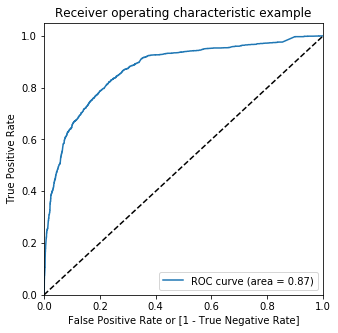

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The AUC is 0.87 which is decent and the curve is not close to the diagonal.

## Finding Optimal Cutoff Point

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.751908,5032,1,1,1,1,1,1,1,1,1,0,0
1,0,0.100072,5316,0,1,1,0,0,0,0,0,0,0,0
2,0,0.078562,4405,0,1,0,0,0,0,0,0,0,0,0
3,1,0.704330,2089,1,1,1,1,1,1,1,1,1,0,0
4,1,0.078562,1370,0,1,0,0,0,0,0,0,0,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.394075  1.000000  0.000000
0.1   0.1  0.577738  0.957175  0.330963
0.2   0.2  0.746140  0.920729  0.632593
0.3   0.3  0.777199  0.853303  0.727704
0.4   0.4  0.799282  0.752620  0.829630
0.5   0.5  0.801436  0.681093  0.879704
0.6   0.6  0.800359  0.618679  0.918519
0.7   0.7  0.771095  0.507062  0.942815
0.8   0.8  0.743447  0.388155  0.974519
0.9   0.9  0.698923  0.254214  0.988148


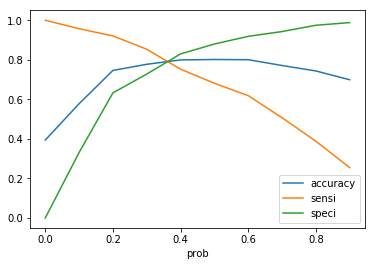

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<b>** From the plot above, 0.35 is the optimum point to take it as a cutoff probability **

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob * 100
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.751908,5032,1,1,1,1,1,1,1,1,1,0,0,1,75.190799
1,0,0.100072,5316,0,1,1,0,0,0,0,0,0,0,0,0,10.007201
2,0,0.078562,4405,0,1,0,0,0,0,0,0,0,0,0,0,7.856163
3,1,0.704330,2089,1,1,1,1,1,1,1,1,1,0,0,1,70.433031
4,1,0.078562,1370,0,1,0,0,0,0,0,0,0,0,0,0,7.856163


## Metrics

In [112]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7897666068222621

In [113]:
# Calcualte the confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2618,  757],
       [ 414, 1781]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8113895216400911

In [116]:
# Let us calculate specificity

TN / float(TN+FP)

0.7757037037037037

In [117]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.2242962962962963


In [118]:
from sklearn.metrics import precision_score, recall_score

In [119]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7017336485421591

In [120]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8113895216400911

## Precision and Recall Tradeoff

In [121]:
from sklearn.metrics import precision_recall_curve

In [122]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      1
 12      1
 13      0
 14      1
 15      0
 16      1
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      0
 26      1
 27      0
 28      0
 29      1
        ..
 5540    1
 5541    0
 5542    0
 5543    0
 5544    0
 5545    0
 5546    0
 5547    1
 5548    0
 5549    0
 5550    0
 5551    0
 5552    0
 5553    1
 5554    0
 5555    0
 5556    1
 5557    0
 5558    1
 5559    0
 5560    0
 5561    0
 5562    0
 5563    0
 5564    1
 5565    1
 5566    1
 5567    1
 5568    0
 5569    0
 Name: Converted, Length: 5570, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      1
 15      0
 16      1
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      1
 24      0
 25      

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

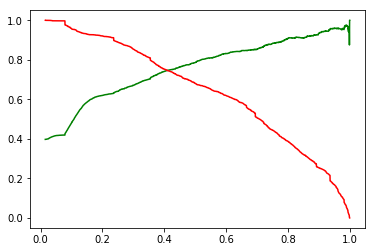

In [124]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<b>From the curve above, 0.42 is the optimum point to take it as a cutoff probability

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob * 100
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,1,0.751908,5032,1,1,1,1,1,1,1,1,1,0,0,1,75.190799
1,0,0.100072,5316,0,1,1,0,0,0,0,0,0,0,0,0,10.007201
2,0,0.078562,4405,0,1,0,0,0,0,0,0,0,0,0,0,7.856163
3,1,0.704330,2089,1,1,1,1,1,1,1,1,1,0,0,1,70.433031
4,1,0.078562,1370,0,1,0,0,0,0,0,0,0,0,0,0,7.856163


## Metrics

In [126]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8005385996409335

In [127]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[2834,  541],
       [ 570, 1625]], dtype=int64)

In [128]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7403189066059226

In [130]:
# Let us calculate specificity

TN / float(TN+FP)

0.8397037037037037

In [131]:
# Calculate false positive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.1602962962962963


In [132]:
from sklearn.metrics import precision_score, recall_score

In [133]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7502308402585411

In [134]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7403189066059226

## Making predictions on the test set

In [135]:
X_test[['Total_Visits','Time_On_Website','Page_Views']] = scaler.transform(X_test[['Total_Visits','Time_On_Website','Page_Views']])

C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [136]:
X_test = X_test[col]
X_test.head()

,No_Email,Time_On_Website,Lead_Origin_lead add form,Lead_Profile_potential lead,Lead_Profile_student of someschool,Occupation_working professional,Last_Activity_sms sent
3833,0,-0.490814,0,0,0,0,1
2508,0,-0.828478,0,1,0,0,1
5291,0,1.304614,0,0,0,0,1
3892,0,-1.031803,0,0,1,0,0
3254,0,-0.596107,0,0,0,0,0


In [137]:
X_test_sm = sm.add_constant(X_test)

In [138]:
y_test_pred = res.predict(X_test_sm)

In [139]:
y_test_pred[:10]

3833    0.339469
2508    0.706860
5291    0.735638
3892    0.014144
3254    0.113834
472     0.887379
3156    0.083914
5141    0.694439
3669    0.103740
62      0.870863
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3833,0.339469
2508,0.706860
5291,0.735638
3892,0.014144
3254,0.113834


In [142]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting CustID to index

y_test_df['CustID'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

,Converted,CustID,0
0,0,3833,0.339469
1,1,2508,0.706860
2,1,5291,0.735638
3,0,3892,0.014144
4,0,3254,0.113834


In [147]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [148]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

C:\Users\mansoori_m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [149]:
# Let's see the head of y_pred_final

y_pred_final.head()

,CustID,Converted,Converted_Prob
0,3833,0,0.339469
1,2508,1,0.706860
2,5291,1,0.735638
3,3892,0,0.014144
4,3254,0,0.113834


<b>We will go with the threshold of 0.42 which yielded better metrics on train set.

In [150]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final['lead_score'] = y_pred_final.Converted_Prob * 100

In [151]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted,lead_score
0,3833,0,0.339469,0,33.946856
1,2508,1,0.706860,1,70.685997
2,5291,1,0.735638,1,73.563838
3,3892,0,0.014144,0,1.414365
4,3254,0,0.113834,0,11.383396


## Metrics

In [152]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8144891122278057

In [153]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1206,  195],
       [ 248,  739]], dtype=int64)

In [154]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7487335359675785

In [156]:
# Let us calculate specificity

TN / float(TN+FP)

0.860813704496788

In [157]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.139186295503212


In [158]:
# Precision

confusion4[1,1]/(confusion4[0,1]+confusion4[1,1])

0.791220556745182

In [159]:
# Recall

confusion4[1,1]/(confusion4[1,0]+confusion4[1,1])

0.7487335359675785

AUC is decent, variables are not many and are easily interpretable. Accuracy, Sensitivity, Precision values are also decent.

Precision ~ 80% which is the target set by CEO.